# Analisis de los Accidentes con Implicaciones de Bicicletas 2018


![](https://static.thenounproject.com/png/11183-200.png)

Primero importamos los paquetes de Python que vamos a requerir para la lectura, limpieza, analisis exploratorio y visualización. Para esto utilizamos:

* **Pandas** - manipulación y analisis de datos para tablas y series de tiempo
* **Datetime** - Conversión a formatos de fecha
* **Re** - biblioteca para expresiones regulares
* **Numpy** - soporte para vectores y matrices
* **Matplotlib** - graficas basado en Matlab
* **Seaborn** - herramientas de visualización mas avanzadas

In [ ]:
import pandas as pd
from datetime import date, datetime, timedelta
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el archivo de los [accidentes con implicaciones de bicicletas en Madrid de 2018](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=20f4a87ebb65b510VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default), para lo cual debemos tener en cuenta las siguientes consideraciones:

* Es un archivo **CSV**
* El archivo no abre con el encoding UTF8, por lo cual hay que utilizar ISO-8859-1. 
* Los datos estan separados por `;` y no `,` 

In [3]:
acc = pd.read_csv("../dat/AccidentesBicicletas_2018.csv", index_col=False, encoding = "ISO-8859-1", sep=';')

### Revisión de la Estructura de la Tabla

Luego de haber cargado el archivo a nuestro ambiente, exploramos la composición de los datos. Revisamos el numero de filas y columnas, la cantidad de valores vacios, las primeras y ultimas observaciones, el tipo de los datos y el nombre de las **columnas**.

In [4]:
acc.columns

Index(['FECHA', 'RANGO HORARIO', 'DIA SEMANA', 'DISTRITO', 'LUGAR ACCIDENTE',
       'Nº', 'Nº PARTE', 'CPFA Granizo', 'CPFA Hielo', 'CPFA Lluvia',
       'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve', 'CPSV Mojada', 'CPSV Aceite',
       'CPSV Barro', 'CPSV Grava Suelta', 'CPSV Hielo', 'CPSV Seca Y Limpia',
       '* Nº VICTIMAS', 'TIPO ACCIDENTE', 'Tipo Vehiculo', 'TIPO PERSONA',
       'SEXO', 'LESIVIDAD', 'Tramo Edad'],
      dtype='object')

Revisamos la **forma** de la tabla, que nos devuelve la cantidad de filas y columnas.

In [5]:
acc.shape

(700, 26)

Revisamos la **información** de la tabla, que nos devuelve el numero de datos en cada columna, el tipo de dato y la memoria que ocupa.

In [6]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 26 columns):
FECHA                 700 non-null object
RANGO HORARIO         700 non-null object
DIA SEMANA            700 non-null object
DISTRITO              700 non-null object
LUGAR ACCIDENTE       700 non-null object
Nº                    700 non-null object
Nº PARTE              700 non-null object
CPFA Granizo          700 non-null object
CPFA Hielo            700 non-null object
CPFA Lluvia           700 non-null object
CPFA Niebla           700 non-null object
CPFA Seco             700 non-null object
CPFA Nieve            700 non-null object
CPSV Mojada           700 non-null object
CPSV Aceite           700 non-null object
CPSV Barro            700 non-null object
CPSV Grava Suelta     700 non-null object
CPSV Hielo            700 non-null object
CPSV Seca Y Limpia    700 non-null object
* Nº VICTIMAS         700 non-null int64
TIPO ACCIDENTE        700 non-null object
Tipo Vehiculo 

Vemos una **muestra** de la tabla, para revisar la composición de los datos. Tanto de las primeras como de las ultimas observaciones.

In [8]:
acc.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,* Nº VICTIMAS,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad
0,01/01/2018,DE 13:00 A 13:59,LUNES,ARGANZUELA,CALLE DE ANCORA - PASEO DE LAS DELICIAS ...,0,2018/25,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 30 A 34 ANOS
1,01/01/2018,DE 15:00 A 15:59,LUNES,CENTRO,CALLE DE ALCALA NUM ...,44,2018/76,NO,NO,NO,...,NO,NO,SI,2,ATROPELLO,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS
2,02/01/2018,DE 12:00 A 12:59,MARTES,SALAMANCA,CALLE DE SERRANO - CALLE DEL CONDE DE ARANDA ...,0,2018/30,NO,NO,NO,...,NO,NO,SI,2,ATROPELLO,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 40 A 44 AÑOS
3,03/01/2018,DE 13:00 A 13:59,MIERCOLES,SALAMANCA,PLAZA DE LA INDEPENDENCIA NUM ...,5,2018/94,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 50 A 54 AÑOS
4,03/01/2018,DE 15:00 A 15:59,MIERCOLES,CIUDAD LINEAL,CALLE DE RAMIREZ DE ARELLANO NUM ...,35,2018/361,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS


In [9]:
acc.tail()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,* Nº VICTIMAS,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad
695,25/12/2018,DE 12:00 A 12:59,MARTES,FUENCARRAL-EL PARDO,CALLE DE BRAOJOS NUM ...,10,2018/16468,NO,NO,NO,...,NO,NO,SI,1,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS
696,28/12/2018,DE 9:00 A 9:59,VIERNES,CHAMARTIN,PASEO DE LA CASTELLANA - PASEO DE LA HABANA ...,0,2018/16651,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS
697,28/12/2018,DE 14:00 A 14:59,VIERNES,CENTRO,CALLE DE GENOVA NUM ...,2,2018/16626,NO,NO,NO,...,NO,NO,SI,2,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 18 A 20 AÑOS
698,29/12/2018,DE 10:00 A 10:59,SABADO,TETUAN,CALLE DE BRAVO MURILLO NUM ...,105,2019/57,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 55 A 59 AÑOS
699,29/12/2018,DE 19:00 A 19:59,SABADO,CHAMBERI,CALLE DE SANTA ENGRACIA NUM ...,135,2018/16655,NO,NO,NO,...,NO,NO,SI,1,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 40 A 44 AÑOS




Observamos la **descripción** de los datos numericos, donde podemos ver la media, desviación estandar, valor minimo, valor maximo, entre otros.


In [10]:
acc.describe()

,* Nº VICTIMAS
count,700.000000
mean,1.127143
std,0.618832
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


### Limpieza de Datos

Teniendo ya información mas detallada del archivo podemos proceder con su limpieza, eliminando las columnas que no son utiles para el analisis objetivo y convirtiendo los datos a el formato deseado. Por ejemplo, podemos observar que la mayoria de columnas estan en formato de texto. Columnas como la fecha debemos pasar a un formato Datetime y columnas como la edad deben estar en formato numerico. 

En primer lugar, eliminamos las columnas de numero de parte, que no nos agrega información relevante para nuestro analisis y las de condiciones climaticas y del estado del suelo, excepto la de lluvia y mojado, pues muy pocos accidentes ocurren bajo esas condiciones por lo cual no agregaran valor. Además, elimnamos el tipo de vehiculo, pues todas las observaciónes son igual a bicicleta y tipo de persona porque la mayoria de los resultados son **CONDUCTOR**, unos pocos son **VIAJEROS** y solo una observación es **TESTIGO**. 

In [11]:
acc2 = acc.drop(['Nº PARTE', 'CPFA Granizo', 'CPFA Hielo',
       'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve', 'CPSV Aceite',
       'CPSV Barro', 'CPSV Grava Suelta', 'CPSV Hielo', 'CPSV Seca Y Limpia', 'Tipo Vehiculo', 'TIPO PERSONA'], 1)

Ahora, renombramos las columnas para tener nombres simples, faciles de manipular.

In [12]:
etiquetas = ['fecha', 'rango_hora', 'dia_semana', 'distrito', 'lugar', 'numero', 'lluvia', 'mojado', 'victimas', 
             'tipo_accidente', 'sexo', 'lesividad', 'rango_edad']
acc2.columns = etiquetas

Extraemos de la columna `rango hora`, la hora de inicio del rango y creamos una nueva columna con esos datos

In [13]:
def extrae_hora(t):
    _, horain, _, _, = t.rango_hora.split(' ')
    return horain

acc2['horain'] = acc2.apply(extrae_hora, axis = 1)

Juntamos la hora con la fecha y utilizamos una formula para convertir los datos de la columna `fecha`, de texto a **datetime**.

In [14]:
acc2['fecha'] = acc2.fecha + ' ' + acc2.horain

In [15]:
formato2 = '%d/%m/%Y %H:%M'
fecha = '01/01/1949 20:30'

def parse_fecha(fecha):
        a = datetime.strptime(fecha, formato2)
        return a

acc2.fecha = acc2.fecha.apply(parse_fecha)

Tambien utilizamos una función para extraer de la columna `rango edad`, la edad minima del rango. Teniendo en cuenta a la vez que hay filas donde el valor es desconocido y sera remplazado por `missing value`.

In [25]:
def extrae_edad(e):
    try:
        _, edadmin, _, _, _, = e.rango_edad.split(' ')
        return edadmin
    except:
        return None

acc2['edadmin'] = acc2.apply(extrae_edad, axis = 1)

Al haber hecho la conversión de las columnas `rango hora` y `rango edad`, a formatos mas utiles, los podemos eliminar de la tabla.

In [26]:
acc2 = acc2.drop(['rango_hora', 'rango_edad'], 1)

Para tener un desempeño optimo de la memoria ocupada por cada dataset convertimos algunas variables de formato texto a formato `categorico`. 

In [27]:
acc2.lluvia = acc2.lluvia.astype('category')
acc2.mojado = acc2.mojado.astype('category')

Adicionalmente, convertimos la columna de edad, extraida previamente, de texto a `entero`. Utilizamos el parametro errors con el valor de `coerce` para que convierta los valores no numericos en `missing values`.

In [28]:
acc2['edadmin'] = pd.to_numeric(acc2['edadmin'], errors='coerce')

Eliminamos los espacios vacios de nuestros resultados para no tener conflictos al realizar filtros.

In [29]:
acc3 = acc2.apply(lambda fila: fila.str.strip() if fila.dtype == 'object' else fila)

Por ultimo, construimos una columna con el valor del mes de cuando ocurrio el accidente. 

In [30]:
acc3['mes'] = acc3.apply(lambda fila: fila.fecha.month, axis=1)

### Analisis Exploratorio Estadistico y Visual

Una vez que contamos con los datos que deseamos evaluar y los tenemos disponibles en el formato deseado podemos empezar a explorar los resultados para tener una idea de la distribución de las variables y como estan relacionadas. 

Para realizar esta tarea podemos utilizar herramientas estadisticas como la desviación estandar, media, mediana, maximos y minimos. Tambien podemos utiliar histogramas y graficos de dispersión.

_Empezamos_, analizando con mayor profundidad las columnas de interes. Detallamos los resultados y su **distribucción**, de las siguientes columnas:

* Numero de victimas

In [31]:
acc3['victimas'].value_counts(dropna=False)

1     628
2      67
3       4
15      1
Name: victimas, dtype: int64

En la columna de victimas vemos que hay un outlier que puede contaminar la muestra y dificultar el analisis grafico de las variables. Por lo cual, haremos una copia de la tabla que no incluya este valor.

In [32]:
acc4 = acc3[acc3['victimas'] < 14]

* Tipo de Accidente

In [33]:
acc4['tipo_accidente'].value_counts(dropna=False)

COLISIÓN DOBLE            315
CAÍDA BICICLETA           295
ATROPELLO                  61
CHOQUE CON OBJETO FIJO     16
CAÍDA MOTOCICLETA           7
COLISIÓN MÚLTIPLE           5
Name: tipo_accidente, dtype: int64

* Lesividad

In [34]:
acc4['lesividad'].value_counts(dropna=False)

HL             569
IL              61
HG              60
NO ASIGNADA      9
Name: lesividad, dtype: int64

* Lluvia

In [35]:
acc4['lluvia'].value_counts(dropna=False)

NO    632
SI     67
Name: lluvia, dtype: int64

* Distrito

In [36]:
acc4['distrito'].value_counts(dropna=False)

CENTRO                 123
RETIRO                  52
CHAMBERI                51
MONCLOA-ARAVACA         51
SALAMANCA               48
CARABANCHEL             36
LATINA                  35
TETUAN                  34
FUENCARRAL-EL PARDO     33
ARGANZUELA              33
PUENTE DE VALLECAS      29
CHAMARTIN               26
CIUDAD LINEAL           26
SAN BLAS                24
HORTALEZA               22
USERA                   18
VILLA DE VALLECAS       15
MORATALAZ               13
VILLAVERDE              12
VICALVARO               10
BARAJAS                  8
Name: distrito, dtype: int64

* Dia de la Semana

In [37]:
acc4['dia_semana'].value_counts(dropna=False)

JUEVES       117
MARTES       105
VIERNES      101
MIERCOLES    100
SABADO        99
LUNES         91
DOMINGO       86
Name: dia_semana, dtype: int64

* Hora Inicial

In [38]:
acc4['horain'].value_counts(dropna=False)

19:00    60
13:00    53
18:00    50
15:00    47
9:00     46
16:00    45
21:00    44
12:00    41
20:00    40
14:00    39
11:00    38
10:00    34
22:00    30
17:00    27
8:00     26
7:00     16
00:00    16
23:00    13
1:00      9
2:00      7
3:00      5
4:00      5
5:00      5
6:00      3
Name: horain, dtype: int64

* Sexo

In [39]:
acc4['sexo'].value_counts(dropna=False)

HOMBRE         546
MUJER          142
NO ASIGNADO     11
Name: sexo, dtype: int64

* Edad

In [40]:
acc4['edadmin'].value_counts(dropna=False)

 25.0    111
 30.0    102
 35.0     83
 40.0     79
 45.0     56
 50.0     48
 18.0     47
 21.0     40
 55.0     36
 15.0     25
NaN       21
 10.0     18
 60.0     14
 65.0     11
 70.0      8
Name: edadmin, dtype: int64

In [41]:
acc4['mes'].value_counts(dropna=False)

9     80
6     79
7     70
10    69
11    62
8     61
5     60
4     54
1     53
2     44
3     34
12    33
Name: mes, dtype: int64

De este analisis podemos concluir que a grandes rasgos no hay problemas masivos con la calidad de los datos. En la columna de edad tenemos 21 `missing values`, en la columna de sexo hay 11 resultados no asignados, en la columna de lesividad hay 9 resultados no asignados y las demas columnas tienen valores completos en la totalidad de sus observaciones.

Volvemos a realizar las funciones de info y describe para ver como los cambios han afectado las columnas, los tipo de datos, el peso del archivo y, de las variables numericas, observar la media, error estandar, maximo, minimo y percentiles. Podemos ver que el archvo paso de 142.3+ KB a 78.0+ KB. Previamente habian int64(1), object(25) y pasamos a category(2), datetime64ns(1), float64(1), int64(2), object(9).

In [42]:
acc4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 14 columns):
fecha             699 non-null datetime64[ns]
dia_semana        699 non-null object
distrito          699 non-null object
lugar             699 non-null object
numero            699 non-null object
lluvia            699 non-null category
mojado            699 non-null category
victimas          699 non-null int64
tipo_accidente    699 non-null object
sexo              699 non-null object
lesividad         699 non-null object
horain            699 non-null object
edadmin           678 non-null float64
mes               699 non-null int64
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 72.5+ KB


De las variables numericas podemos concluir que la mayoria de los accidentes tienen solo una victima y que la edad promedio es de 34 años.

In [43]:
acc4.describe()

,victimas,edadmin,mes
count,699.000000,678.000000,699.000000
mean,1.107296,34.153392,6.722461
std,0.327692,13.149636,3.194317
min,1.000000,10.000000,1.000000
25%,1.000000,25.000000,4.000000
50%,1.000000,30.000000,7.000000
75%,1.000000,45.000000,9.000000
max,3.000000,70.000000,12.000000


**Despues**, hacemos una serie de agrupaciones para ver como se comportan los datos entre las variables.

En primer lugar, evaluamos el distrito con el dia de semana, agrupado por la sumatoria de las victimas. Con esto podemos ver que dias de la semana hay mas accidentes por distrito.

In [44]:
tmp = acc4.groupby(['distrito', 'dia_semana']).agg({'victimas': 'sum'})
tmp

victimas
distrito          dia_semana          
ARGANZUELA        DOMINGO            3
                  JUEVES             8
                  LUNES              8
                  MARTES             6
                  MIERCOLES          7
                  SABADO             4
                  VIERNES            1
BARAJAS           JUEVES             1
                  LUNES              2
                  MIERCOLES          1
                  SABADO             2
                  VIERNES            2
CARABANCHEL       DOMINGO            8
                  JUEVES             4
                  LUNES              7
                  MARTES             7
                  MIERCOLES          4
                  SABADO             3
                  VIERNES           10
CENTRO            DOMINGO           21
                  JUEVES            18
                  LUNES             14
                  MARTES            20
                  MIERCOLES         26
                  SABADO            18
                  VIERNES           17
CHAMARTIN         DOMINGO            1
                  JUEVES             7
                  LUNES              2
                  MARTES             7
...                                ...
TETUAN            LUNES              3
                  MARTES             8
                  MIERCOLES          7
                  SABADO             4
                  VIERNES            8
USERA             DOMINGO            2
                  JUEVES             2
                  LUNES              2
                  MARTES             1
                  MIERCOLES          6
                  SABADO             2
                  VIERNES            6
VICALVARO         DOMINGO            1
                  JUEVES             3
                  MARTES             1
                  MIERCOLES          2
                  SABADO             5
VILLA DE VALLECAS DOMINGO            3
                  JUEVES             3
                  LUNES              3
                  MARTES             2
                  SABADO             2
                  VIERNES            2
VILLAVERDE        DOMINGO            2
                  JUEVES             2
                  LUNES              1
                  MARTES             3
                  MIERCOLES          1
                  SABADO             3
                  VIERNES            1

[141 rows x 1 columns]

Ahora, agrupamos por dia de semana y tipo de lesividad agregando por la suma de las victimas, para evaluar si varian la gravedad de las lesiones por dia de la semana. A gran escala vemos que las variables mantienen un comportamiento proporcional entre los diferentes dias de la semana. 

In [45]:
tmp = acc4.groupby(['dia_semana', 'lesividad']).agg({'victimas': 'sum'})
tmp

victimas
dia_semana lesividad            
DOMINGO    HG                 10
           HL                 81
           IL                  5
           NO ASIGNADA         1
JUEVES     HG                  8
           HL                107
           IL                  7
           NO ASIGNADA         3
LUNES      HG                  5
           HL                 77
           IL                 12
MARTES     HG                  8
           HL                 99
           IL                 13
           NO ASIGNADA         1
MIERCOLES  HG                  8
           HL                 97
           IL                  9
SABADO     HG                 14
           HL                 85
           IL                  7
           NO ASIGNADA         2
VIERNES    HG                 15
           HL                 86
           IL                 11
           NO ASIGNADA         3

Realizamos una agrupación por distrito, evaluando la mediana de la edad. Vemos que la mayoria de los distritos tienen una mediana de 30 o mas años. Habiendo unicamente una excepcion de 21 años y 5 con al menos 40 años. 

In [46]:
tmp = acc4.groupby(['distrito']).agg({'edadmin': 'median'})
tmp

,edadmin
distrito,
ARGANZUELA,35.0
BARAJAS,30.0
CARABANCHEL,32.5
CENTRO,30.0
CHAMARTIN,32.5
CHAMBERI,30.0
CIUDAD LINEAL,30.0
FUENCARRAL-EL PARDO,40.0
HORTALEZA,42.5


Hacemos una agrupación para ver como se distribuyen los tipos de accidente entre los meses del año. De la tabla, podemos ver que la cantidad de accidentes tiene un comportamiento proporcional através del tiempo. Siendo las categorias de **CAÍDA BICICLETA** y **COLISIÓN DOBLE** las mas recurrentes todos los meses.

In [47]:
tmp = acc4.groupby(['mes', 'tipo_accidente']).agg({'tipo_accidente': 'count'})
tmp

tipo_accidente
mes tipo_accidente                        
1   ATROPELLO                            3
    CAÍDA BICICLETA                     21
    CAÍDA MOTOCICLETA                    1
    CHOQUE CON OBJETO FIJO               1
    COLISIÓN DOBLE                      26
    COLISIÓN MÚLTIPLE                    1
2   ATROPELLO                            3
    CAÍDA BICICLETA                     14
    CHOQUE CON OBJETO FIJO               1
    COLISIÓN DOBLE                      26
3   ATROPELLO                            1
    CAÍDA BICICLETA                     15
    COLISIÓN DOBLE                      18
4   ATROPELLO                            6
    CAÍDA BICICLETA                     28
    CHOQUE CON OBJETO FIJO               3
    COLISIÓN DOBLE                      17
5   ATROPELLO                            7
    CAÍDA BICICLETA                     24
    CAÍDA MOTOCICLETA                    1
    CHOQUE CON OBJETO FIJO               1
    COLISIÓN DOBLE                      27
6   ATROPELLO                            5
    CAÍDA BICICLETA                     27
    CHOQUE CON OBJETO FIJO               4
    COLISIÓN DOBLE                      41
    COLISIÓN MÚLTIPLE                    2
7   ATROPELLO                            8
    CAÍDA BICICLETA                     27
    CAÍDA MOTOCICLETA                    3
    CHOQUE CON OBJETO FIJO               1
    COLISIÓN DOBLE                      31
8   ATROPELLO                            3
    CAÍDA BICICLETA                     32
    CHOQUE CON OBJETO FIJO               1
    COLISIÓN DOBLE                      24
    COLISIÓN MÚLTIPLE                    1
9   ATROPELLO                            9
    CAÍDA BICICLETA                     35
    COLISIÓN DOBLE                      36
10  ATROPELLO                            9
    CAÍDA BICICLETA                     31
    CAÍDA MOTOCICLETA                    1
    CHOQUE CON OBJETO FIJO               3
    COLISIÓN DOBLE                      25
11  ATROPELLO                            4
    CAÍDA BICICLETA                     24
    CAÍDA MOTOCICLETA                    1
    CHOQUE CON OBJETO FIJO               1
    COLISIÓN DOBLE                      31
    COLISIÓN MÚLTIPLE                    1
12  ATROPELLO                            3
    CAÍDA BICICLETA                     17
    COLISIÓN DOBLE                      13

Adicional a las agrupaciones podemos realizar filtros deseados para encontrar resultados especificos dentro de la tabla.

Hacemos una busqueda de los accidentes ocurridos en lunes del tipo atropello. Vemos que hay 11 observaciones, que ninguno ocurrio con lluvia o estado mojado y todos de hombres. 

In [48]:
acc4[(acc4['dia_semana'] == 'LUNES') & (acc4['tipo_accidente'] == 'ATROPELLO')]

,fecha,dia_semana,distrito,lugar,numero,lluvia,mojado,victimas,tipo_accidente,sexo,lesividad,horain,edadmin,mes
1,2018-01-01 15:00:00,LUNES,CENTRO,CALLE DE ALCALA NUM,44,NO,NO,2,ATROPELLO,HOMBRE,HL,15:00,25.0,1
133,2018-04-02 15:00:00,LUNES,RETIRO,AVENIDA DE LA CIUDAD DE BARCELONA NUM,144,NO,NO,1,ATROPELLO,HOMBRE,IL,15:00,25.0,4
134,2018-04-02 18:00:00,LUNES,RETIRO,PASEO DE LA INFANTA ISABEL - PLAZA DEL EMPERAD...,0,NO,NO,1,ATROPELLO,HOMBRE,IL,18:00,40.0,4
184,2018-04-30 12:00:00,LUNES,SAN BLAS,CALLE DE DEYANIRA NUM,23,NO,NO,1,ATROPELLO,HOMBRE,HL,12:00,50.0,4
360,2018-07-16 17:00:00,LUNES,MORATALAZ,CALLE DEL ARROYO FONTARRON NUM,79,NO,NO,1,ATROPELLO,HOMBRE,IL,17:00,25.0,7
477,2018-09-10 09:00:00,LUNES,ARGANZUELA,PASEO DE SANTA MARIA DE LA CABEZA NUM,76,NO,NO,2,ATROPELLO,HOMBRE,HL,9:00,45.0,9
512,2018-09-24 11:00:00,LUNES,VILLA DE VALLECAS,CALLE REAL DE ARGANDA NUM,10,NO,NO,1,ATROPELLO,HOMBRE,IL,11:00,18.0,9
536,2018-10-01 11:00:00,LUNES,CARABANCHEL,GLORIETA DEL VALLE DE ORO NUM,2,NO,NO,1,ATROPELLO,HOMBRE,IL,11:00,60.0,10
572,2018-10-15 14:00:00,LUNES,CIUDAD LINEAL,AVENIDA DE DAROCA NUM,90,NO,NO,1,ATROPELLO,HOMBRE,IL,14:00,50.0,10
588,2018-10-22 16:00:00,LUNES,SALAMANCA,CALLE DE ALCALA - PLAZA DE LA INDEPENDENCIA,0,NO,NO,1,ATROPELLO,HOMBRE,IL,16:00,35.0,10


Ademas de los filtros, podemos organizar los resultados por campo. En este caso, buscamos los accidentes de lesividad de herida grave, de hombres en el mes de septiembre. Todo ordenado por orden alfabetico del distrito.

In [49]:
acc4[(acc4['lesividad'] == 'HG') & (acc4['sexo'] == 'HOMBRE') & (acc4['mes'] == 9.0)].sort_values('distrito')

,fecha,dia_semana,distrito,lugar,numero,lluvia,mojado,victimas,tipo_accidente,sexo,lesividad,horain,edadmin,mes
497,2018-09-19 09:00:00,MIERCOLES,CARABANCHEL,GLORIETA DEL MARQUES DE VADILLO NUM,1,NO,NO,1,COLISIÓN DOBLE,HOMBRE,HG,9:00,30.0,9
499,2018-09-19 21:00:00,MIERCOLES,CARABANCHEL,PARQUE DE MADRID RIO (RIBERA OESTE) KM.,5600,NO,NO,1,CAÍDA BICICLETA,HOMBRE,HG,21:00,40.0,9
524,2018-09-28 08:00:00,VIERNES,MONCLOA-ARAVACA,CARRETERA DE RODAJOS,0,NO,NO,2,ATROPELLO,HOMBRE,HG,8:00,30.0,9
535,2018-09-30 12:00:00,DOMINGO,MONCLOA-ARAVACA,CAMINO DEL PRINCIPE NUM,2,NO,NO,1,CAÍDA BICICLETA,HOMBRE,HG,12:00,55.0,9
474,2018-09-08 18:00:00,SABADO,RETIRO,CALLE DE CLAUDIO MOYANO NUM,2,NO,NO,1,CAÍDA BICICLETA,HOMBRE,HG,18:00,25.0,9


Empezamos realizando el **analisis exploratorio visual**. Iniciamos con la distribución de las variables de mes y edad.

Utilizamos el proximo comando para que se vean más grandes los gráficos en el notebook.

In [50]:
from matplotlib import rcParams
import matplotlib
rcParams['figure.figsize'] = 18, 10
sns.set_context('talk')
sns.set_style("darkgrid")

La edad vemos que tiene una distribucción muy parecida a la normal. Tiene el pico en el medio, aunque un poco inclinado a la izquierda, siendo las personas de 25 a 35 años las que mas accidentes tienen, lo cual es consistente con el hecho que son las personas que mas utilizan la bicicleta, mientras que las personas menores a los 15 años y mayores a los 40 tienden a utilizar en menor proporcion este medio.

C:\Users\Xseed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


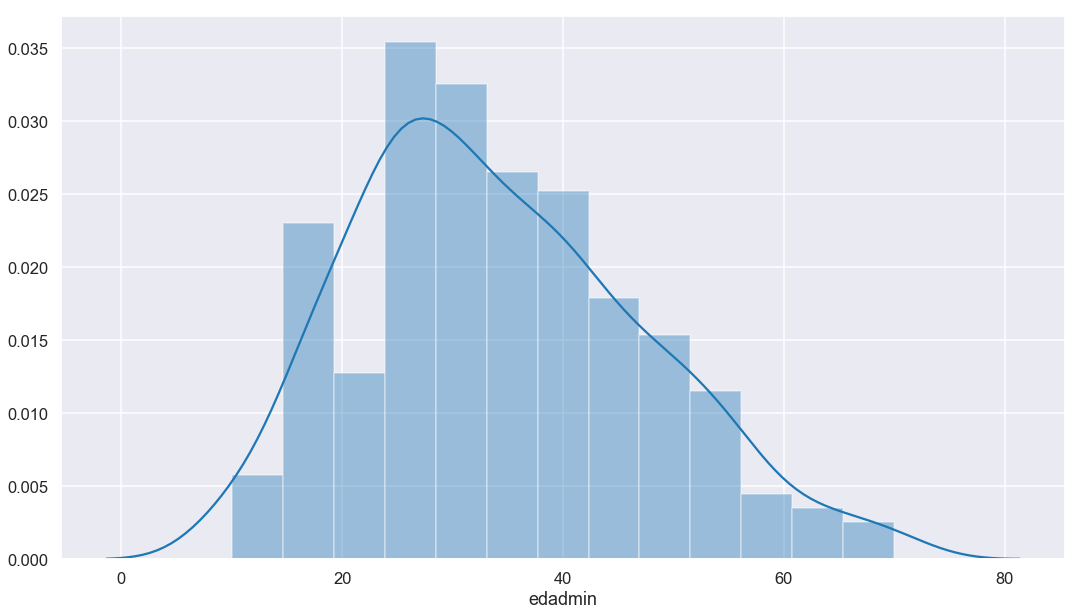

In [51]:
tmp = acc4[acc4.edadmin > 0]
out = sns.distplot(tmp.edadmin, bins=13)


Los meses tienen una distribucción menos regular, vemos que en la temporada de verano es cuando mas accidentes se presentan siendo por el contrario el invierno donde menos accidentes hay con un leve incremento en enero en comparación a diciembre, febrero y marzo.

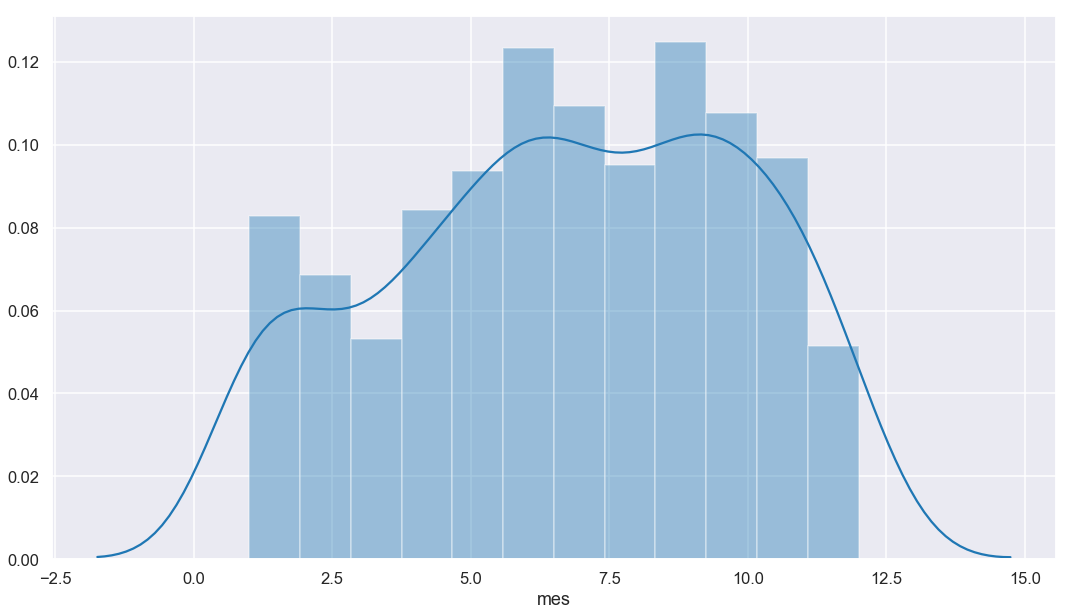

In [52]:
out = sns.distplot(acc4.mes, bins=12)

En cuanto al comportamiento entre los dias de la semana, vemos que el jueves es cuando mas accidentes se presentan, con cerca de 120, el domingo es cuando menos accidentes hay con cerca de 90. Los demas dias tienen un comportamiento muy parejo oscilando entre 95 y 105.

Text(0, 0.5, 'Cantidad de accidentes')

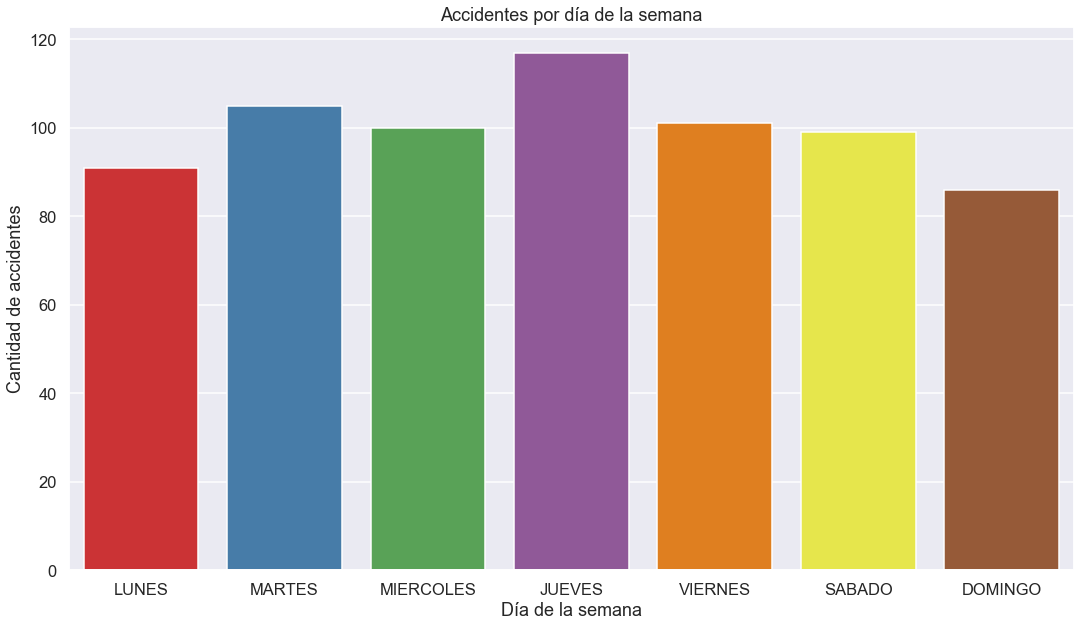

In [61]:
o1 = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']
out = sns.countplot(x='dia_semana', order = o1, data=acc4, palette="Set1")
plt.title('Accidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel("Cantidad de accidentes")

Para organizar las variables en los graficos definimos el orden.

In [62]:
o = ['CENTRO', 'RETIRO', 'CHAMBERI', 'MONCLOA-ARAVACA', 'SALAMANCA', 
 'CARABANCHEL', 'LATINA', 'TETUAN', 'ARGANZUELA', 'FUENCARRAL-EL PARDO', 
 'PUENTE DE VALLECAS', 'CHAMARTIN', 'CIUDAD LINEAL', 'SAN BLAS', 'HORTALEZA',
 'USERA', 'VILLA DE VALLECAS', 'MORATALAZ', 'VILLAVERDE', 'VICALVARO', 'BARAJAS']

o2 = ['1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00',
        '11:00', '12:00','13:00','14:00', '15:00', '16:00', '17:00', 
      '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '00:00']

o4 = ['IL', 'HL', 'HG']

o5 = ['IL', 'HL', 'HG', 'NO ASIGNADA']

Hacemos un grafico de dispersión evaluando el tipo de lesividad y su relación con la edad. Unicamente vemos que las heridas leves son las que mayor observaciones tienen pero no parece haber un aumento en las heridas graves con un aumento en la edad, aunque si se presenta una ausencia de heridas graves en sujetos menores de 20 años.

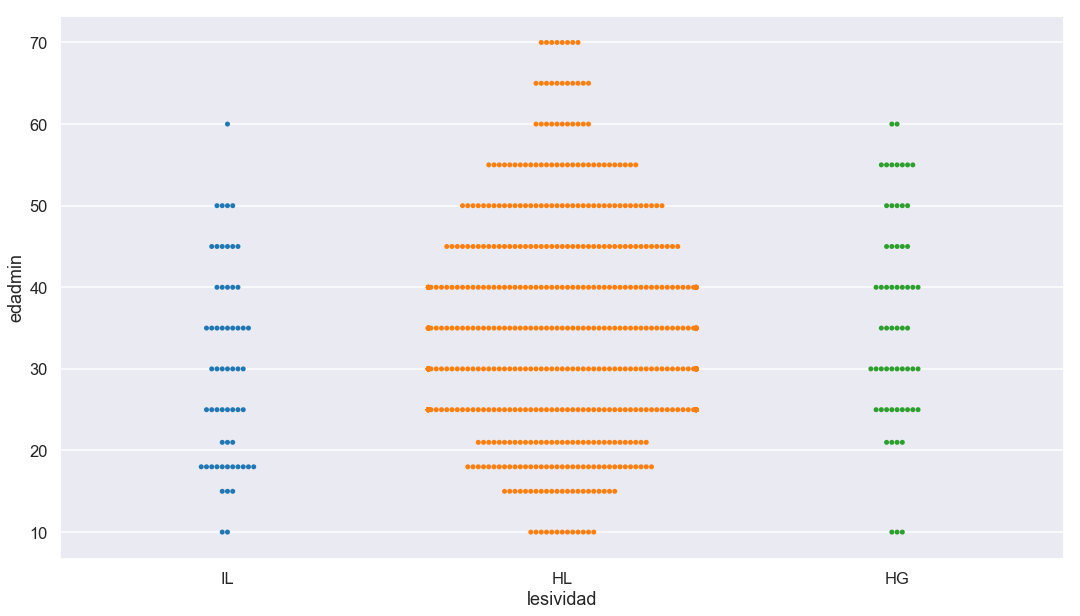

In [63]:
out = sns.swarmplot(x='lesividad', y='edadmin', order = o4, data=acc4[acc4['lesividad'] != 'NO ASIGNADA'])

Hacemos tambien un grafico de dispersión evaluando el sexo y la edad. Vemos que los hombres tienen muchos mas accidentes y en especial con los usuarios menores de 40. 

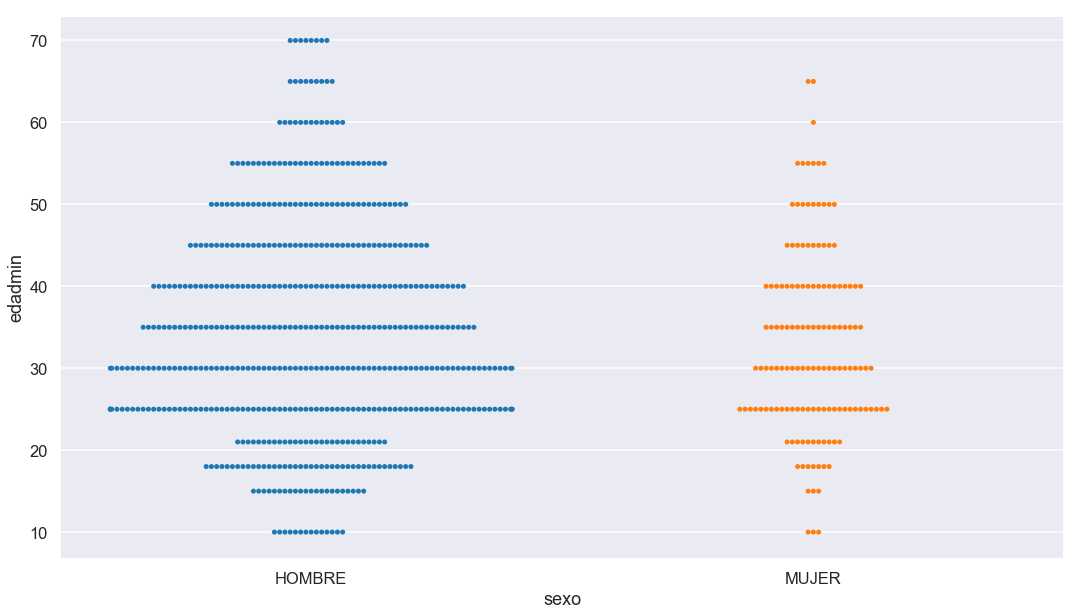

In [64]:
out = sns.swarmplot(x='sexo', y='edadmin', data=acc4[acc4.sexo != 'NO ASIGNADO'])

Para saber cual es el distrito con mayores accidentes creamos una grafica de barras horizontal. Observamos que el centro es de lejos el distrito mas accidentado, lo cual es bastante util para determinar donde enfocar las estrategias de prevencción de accidentes. Retiro, Chamberi, Moncloa-Aravaca y Salamanca tambien tienen cifras altas. 

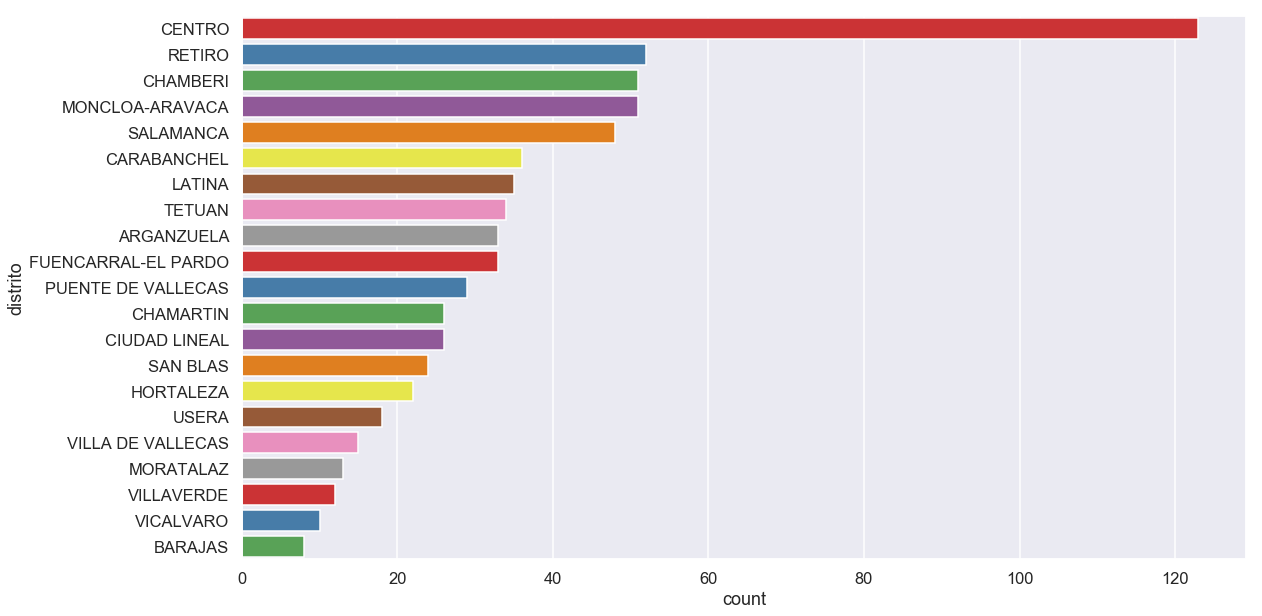

In [65]:
out = sns.countplot(y='distrito', data=acc4, palette='Set1', order=o )

Ahora bien, la distribucción de los accidentes en las horas del dia tienen una cola grande sobre la izquierda. Es decir, que en las horas de la madrugada es cuando menos accidentes hay, logicamente pues es tambien cuando menos se utilizan las bicicletas. Por otro lado, las 19:00 es cuando mas accidentes ocurren, siendo alto tambien a las 9:00, 13:00 y 18:00, horas donde la mayoria de la gente se desplaza a estudiar, almorzar y trabajar.

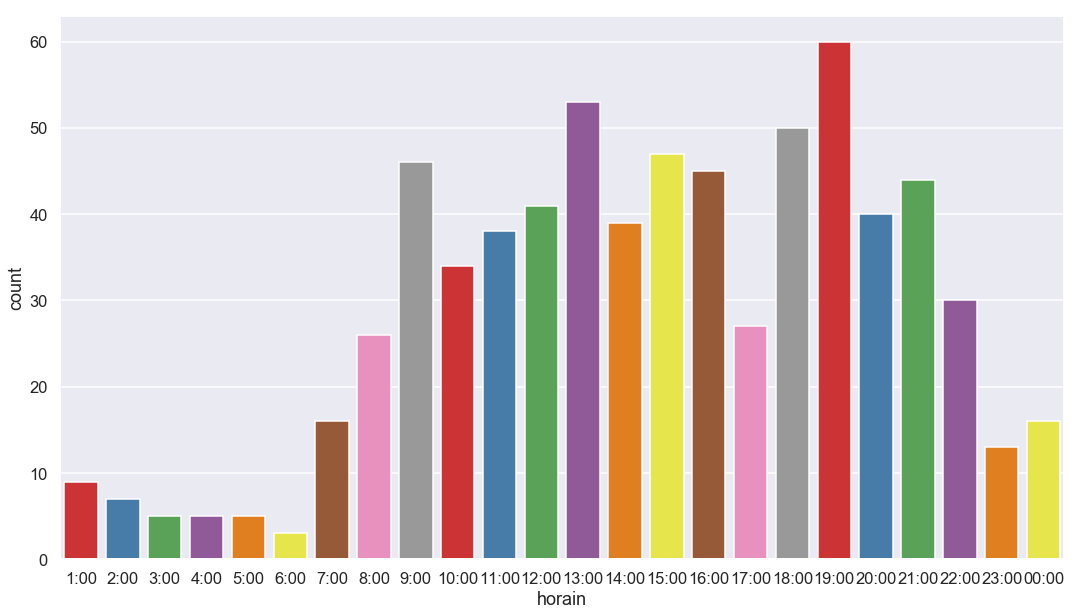

In [66]:
out = sns.countplot(x='horain', data=acc4, order=o2, palette='Set1')

Utilizando un catplot, podemos construir un grafico comparando los valores por el resultado de una variable. En este caso, vamos a utilizar la variable sexo, para observar como se relaciona la edad con el tipo de lesividad. En la grafica de dispersión que vimos previamente, del tipo de lesividad, no era claro que existiera una relación. Sin embargo, al utilizar un boxplot vemos un claro incremento en la mediana de la edad de los hombres, entre mas grave sea la lesión. En el caso de las mujeres no observamos ese comportamiento.

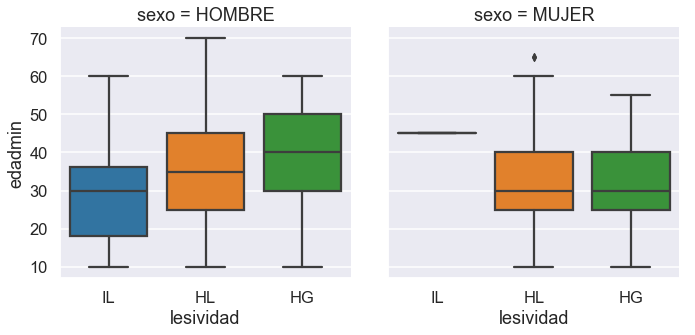

In [68]:
g = sns.catplot(x="lesividad", y='edadmin', order = o4, col="sexo",
                 data=acc4[acc4.sexo != 'NO ASIGNADO'], kind="box")

Analizamos, en los 5 distritos con mas accidentes, la distribucción de los accidentes entre los meses del año, diferenciando los accidentes que se dieron con y sin lluvia. Podemos observar una diferencia marcada entre los distritos, cuando no hubo lluvia. Por ejemplo, el distrito del retiro tiene pocos accidentes en los ultimos meses, mientras que Moncloa tiene menor cantidad en los primeros meses. Centro tiene una distribución mas uniforme en todos los meses excepto en marzo que hubo una reducción en los todos los distritos analizados. Chamberi, por otro lado tiene menores accidentes en los meses que presentan los picos como lo son junio y septiembre, pero la mayoria de sus incidentes se producen en julio y octubre. De los casos con lluvia vemos que retiro es mas afectado en la primera mitad del año mientras que Chamberi y Moncloa al final del año. 

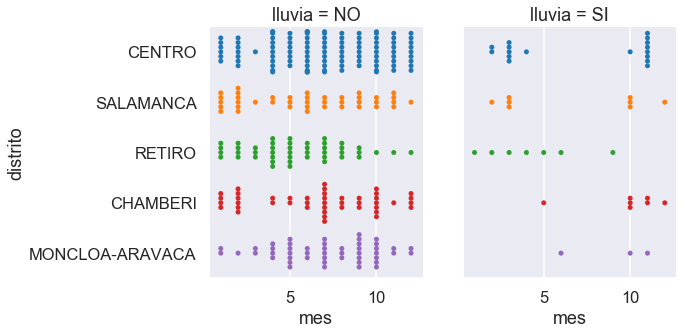

In [69]:
tmp = acc4[(acc4.distrito == 'CENTRO') | (acc4.distrito == 'RETIRO') | (acc4.distrito == 'CHAMBERI') 
           | (acc4.distrito == 'MONCLOA-ARAVACA') | (acc4.distrito == 'SALAMANCA')]

g = sns.catplot(x="mes", y='distrito', col="lluvia",
                 data=tmp, kind="swarm")

Para analizar como evoluciona el numero de victimas en el año, hacemos una grafica linear que mide el numero de victimas por mes. En el primer trimestre del año, la variable presenta una tendencia negativa. Las cifras van cayendo de enero a febrero y de febrero a marzo. Luego, en el segundo trimestre suben pasando de 40 victimas en marzo a alrededor de 95 en junio. En el tercer trimestre, las cifras caen levemente en julio y mas pronunciado en agosto, para luego subir a valores maximos en spetiembre. En el ultimo trimestre se presenta una caida constante y pronunciada llegando en diciembre a los valores minimos. 

C:\Users\Xseed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


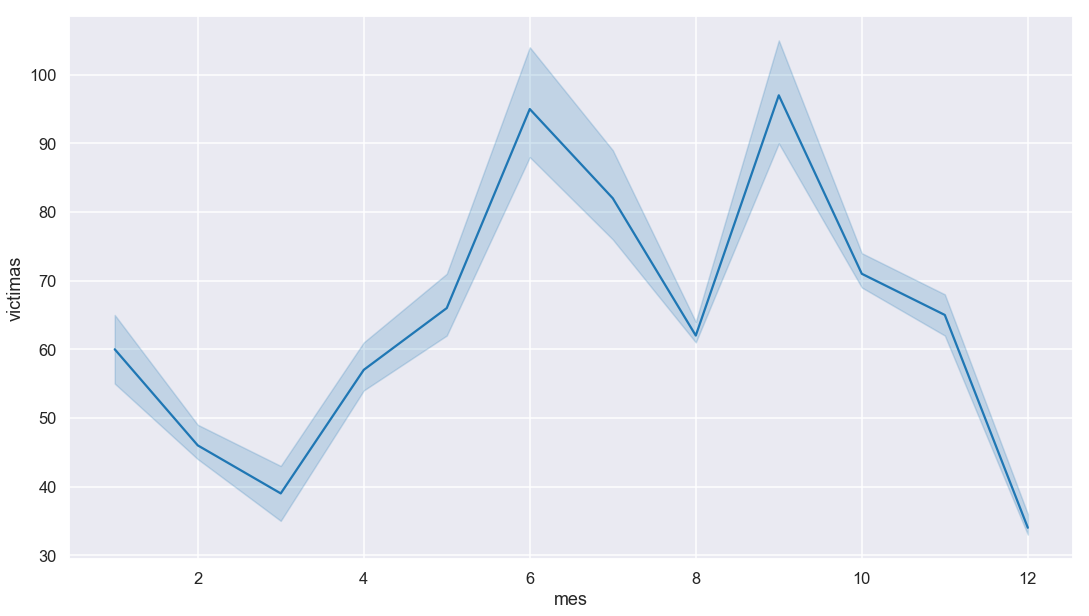

In [70]:
g = sns.lineplot(x="mes", y='victimas', estimator ='sum',
                 data=acc4)

De la siguiente grafica podemos concluir que la gran mayoria de accidentes que se presentan son de lesividad `Herida Leve`. Los accidentes con implicaciones de `Herida Grave` no son frecuentes aunque se dan en mayor proporción en los hombres, al igual que todos los accidentes en general.

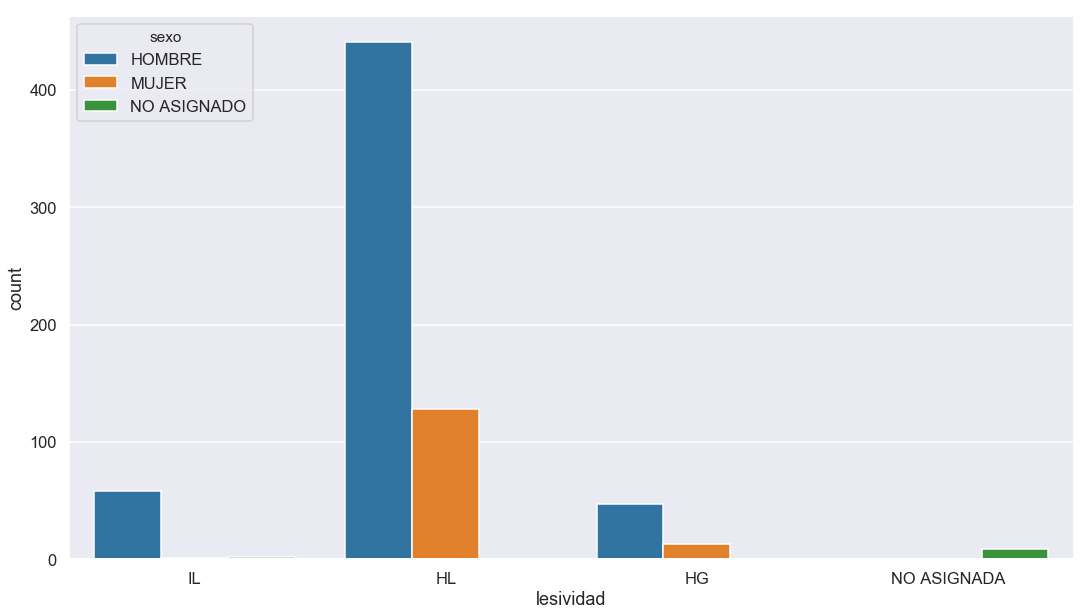

In [71]:
ax = sns.countplot(x="lesividad", data=acc4, hue='sexo', order = o5)

Analizando la lesividad, con respecto a los dias de la semana vemos que los dias viernes y sabado ocurren una mayor proporción de accidentes de `Herida Grave`, mientras que lunes y martes ocurren una mayor proporción de `Ilesos`.

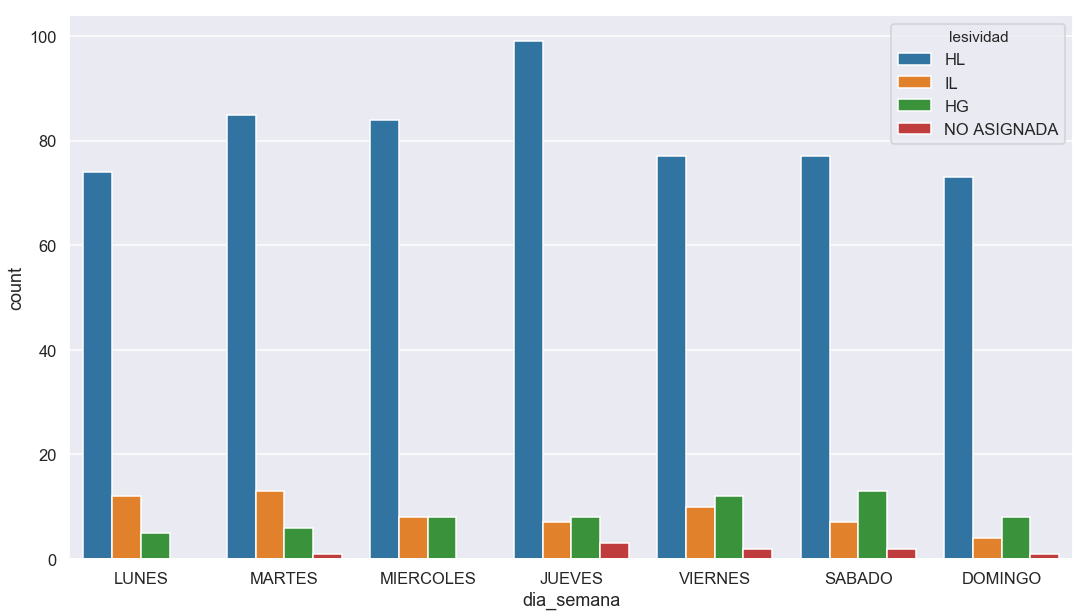

In [72]:
ax = sns.countplot(x="dia_semana", data=acc4 , hue='lesividad', order = o1)

Como mencionamos previamente, la mayoria de los accidentes afectan solo a una victima. El grafico de violin comprueba que hay pocas observaciones con dos victimas y unicamente en martes, viernes y sabado hay observaciones de accidentes de 3 victimas. 

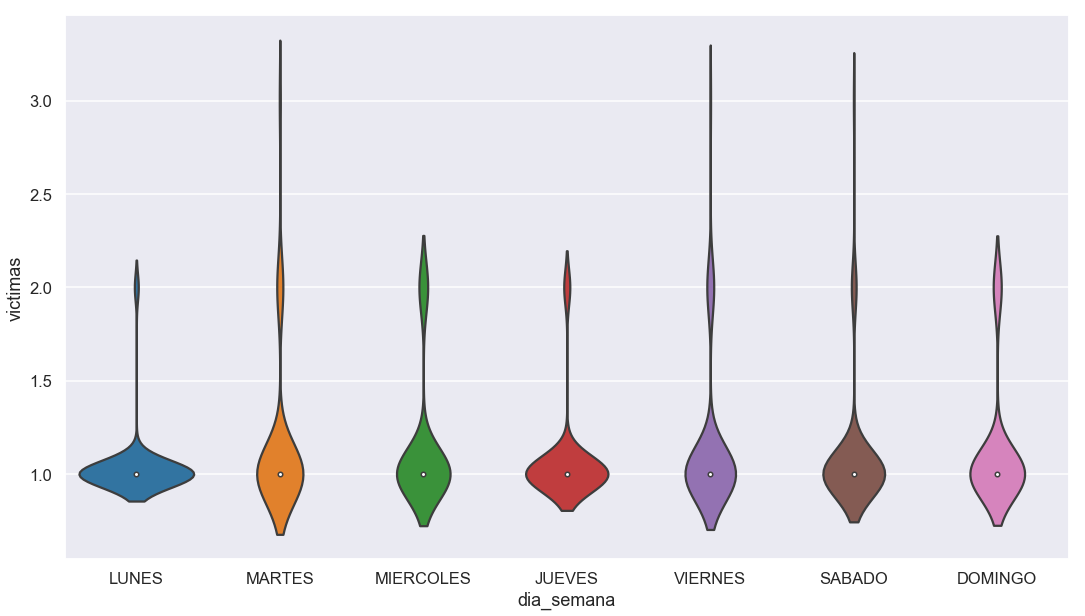

In [73]:
out = sns.violinplot(x='dia_semana', y='victimas', data=acc4, order = o1)

Otra opción en Pandas es convertir las tablas en series de tiempo. Esto se puede lograr asignandole al indice una columna de fecha.

In [74]:
accT = acc4.set_index(acc4.fecha)

Esto nos permite realizar filtros por fechas o rangos de fechas.

In [75]:
accT.loc['2018-01-01 10:00' : '2018-01-07 23:59'].head()

,fecha,dia_semana,distrito,lugar,numero,lluvia,mojado,victimas,tipo_accidente,sexo,lesividad,horain,edadmin,mes
fecha,,,,,,,,,,,,,,
2018-01-01 13:00:00,2018-01-01 13:00:00,LUNES,ARGANZUELA,CALLE DE ANCORA - PASEO DE LAS DELICIAS,0,NO,NO,1,COLISIÓN DOBLE,HOMBRE,HL,13:00,30.0,1
2018-01-01 15:00:00,2018-01-01 15:00:00,LUNES,CENTRO,CALLE DE ALCALA NUM,44,NO,NO,2,ATROPELLO,HOMBRE,HL,15:00,25.0,1
2018-01-02 12:00:00,2018-01-02 12:00:00,MARTES,SALAMANCA,CALLE DE SERRANO - CALLE DEL CONDE DE ARANDA,0,NO,NO,2,ATROPELLO,HOMBRE,HL,12:00,40.0,1
2018-01-03 13:00:00,2018-01-03 13:00:00,MIERCOLES,SALAMANCA,PLAZA DE LA INDEPENDENCIA NUM,5,NO,NO,1,COLISIÓN DOBLE,HOMBRE,HL,13:00,50.0,1
2018-01-03 15:00:00,2018-01-03 15:00:00,MIERCOLES,CIUDAD LINEAL,CALLE DE RAMIREZ DE ARELLANO NUM,35,NO,NO,1,COLISIÓN DOBLE,HOMBRE,HL,15:00,25.0,1


Adicionalmente podemos crear nuevas tablas agregando por la periodicidad deseada y escogiendo una función de agregación como suma, promedio, mediana, maximo, minimo, etc.

En este caso, generamos una tabla con una periodicidad diaria, agregando contando los resultados.

In [76]:
acc_dia = accT.resample('D').count()

Para poder construir graficas con la variabe de fecha, sobreescribimos la columna fecha con los valores del indice. 

In [77]:
acc_dia.fecha = acc_dia.index
acc_dia.head()

,fecha,dia_semana,distrito,lugar,numero,lluvia,mojado,victimas,tipo_accidente,sexo,lesividad,horain,edadmin,mes
fecha,,,,,,,,,,,,,,
2018-01-01,2018-01-01,2,2,2,2,2,2,2,2,2,2,2,2,2
2018-01-02,2018-01-02,1,1,1,1,1,1,1,1,1,1,1,1,1
2018-01-03,2018-01-03,3,3,3,3,3,3,3,3,3,3,3,3,3
2018-01-04,2018-01-04,4,4,4,4,4,4,4,4,4,4,4,4,4
2018-01-05,2018-01-05,1,1,1,1,1,1,1,1,1,1,1,1,1


Otro escenario construido, fue agregando con una periodicidad mensual con base en la mediana. Esta formula conserva unicamente variables numericas. Nos permite ver la mediana de la edad en cada mes del año.

In [78]:
acc_mes = accT.resample('M').median()

In [79]:
acc_mes['fecha1'] = acc_mes.index
acc_mes.head()

,victimas,edadmin,mes,fecha1
fecha,,,,
2018-01-31,1,35.0,1,2018-01-31
2018-02-28,1,30.0,2,2018-02-28
2018-03-31,1,25.0,3,2018-03-31
2018-04-30,1,35.0,4,2018-04-30
2018-05-31,1,35.0,5,2018-05-31


Podemos visualizar esta información con una grafica de linea. De la cual, podemos concluir que en abril es excepcionalmente bajo, llegando a los 25 años. Mientras que, la mayoria de los meses oscila entre 30 y 35 años.

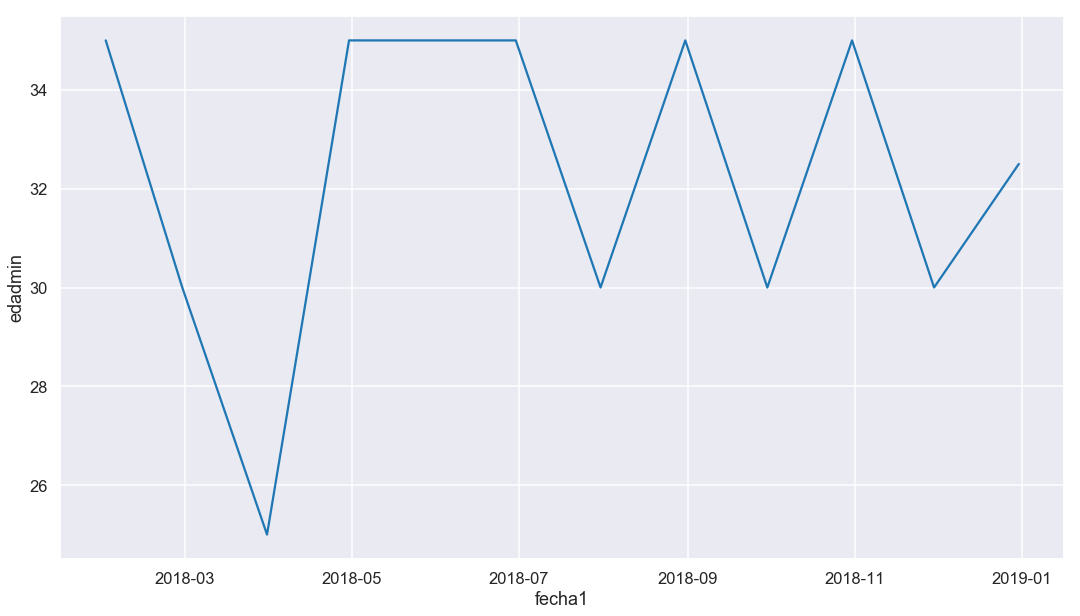

In [80]:
g = sns.lineplot(x='fecha1', y='edadmin', estimator ='sum',
                 data=acc_mes)

Por ultimo, hacemos una tabla de periodicidad mensual, sumando los valores.

In [81]:
acc_mes_sum = accT.resample('M').sum()

Al estar el mes en un formato numerico, se han sumado las observaciones por mes, por lo cual redefinimos los valores de la columna.

In [82]:
acc_mes_sum['fecha1'] = acc_mes_sum.index
acc_mes_sum['mes'] = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
acc_mes_sum.head()

,victimas,edadmin,mes,fecha1
fecha,,,,
2018-01-31,60,1860.0,Enero,2018-01-31
2018-02-28,46,1385.0,Febrero,2018-02-28
2018-03-31,39,978.0,Marzo,2018-03-31
2018-04-30,57,1830.0,Abril,2018-04-30
2018-05-31,66,2131.0,Mayo,2018-05-31


Para visualizar los resultados, utilizamos una grafica de barras para medir los meses donde hay mas victimas. Siendo la mediana del numero de victimas 1 y el promedio 1.10, vemos que el numero de victimas se comporta de forma similar a la cantidad de accidentes. Podemos concluir que junio y septiembre son los meses donde hay mas victimas. Diciembre y marzo, son los meses donde menos victimas hay. 

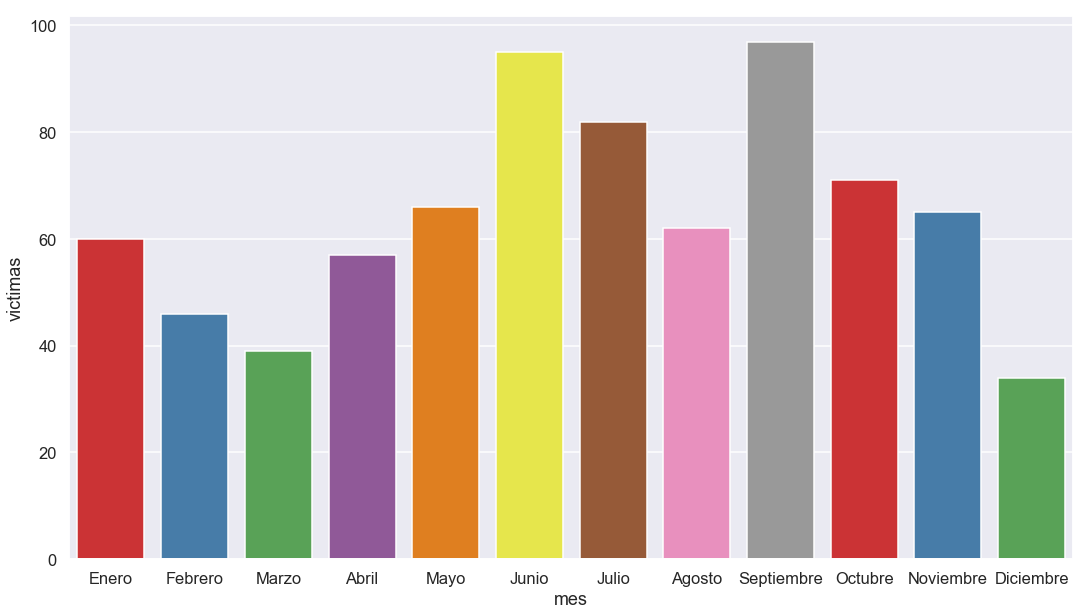

In [83]:
g = sns.barplot(x='mes', y='victimas', palette = 'Set1', saturation=0.75,
                data=acc_mes_sum)